In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split

In [12]:
from google.colab import files


uploaded = files.upload()


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pandas as pd
df = pd.read_csv('toyota.csv')
print(df)


               model  year  price transmission  mileage fuelType  tax   mpg  \
0               GT86  2016  16000       Manual    24089   Petrol  265  36.2   
1               GT86  2017  15995       Manual    18615   Petrol  145  36.2   
2               GT86  2015  13998       Manual    27469   Petrol  265  36.2   
3               GT86  2017  18998       Manual    14736   Petrol  150  36.2   
4               GT86  2017  17498       Manual    36284   Petrol  145  36.2   
...              ...   ...    ...          ...      ...      ...  ...   ...   
6733              IQ  2011   5500    Automatic    30000   Petrol   20  58.9   
6734   Urban Cruiser  2011   4985       Manual    36154   Petrol  125  50.4   
6735   Urban Cruiser  2012   4995       Manual    46000   Diesel  125  57.6   
6736   Urban Cruiser  2011   3995       Manual    60700   Petrol  125  50.4   
6737   Urban Cruiser  2011   4495       Manual    45128   Petrol  125  50.4   

      engineSize  
0            2.0  
1            

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


<Axes: >

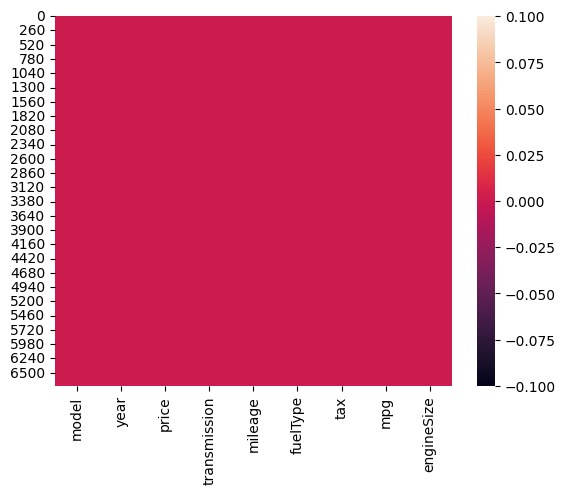

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


# Visualisasi Data

<Axes: >

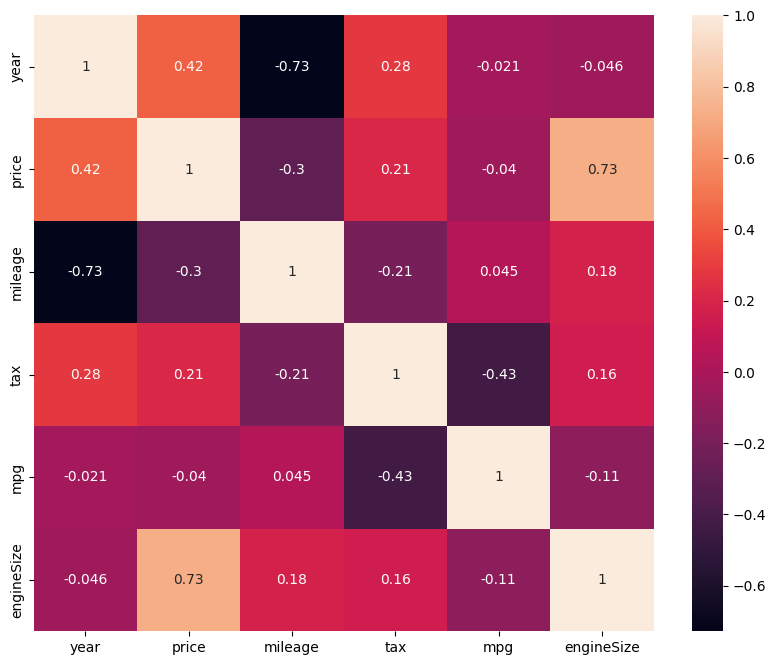

In [ ]:
df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

## Jumlah Mobil Berdasarkan Model

In [ ]:
print(df.head())

   year  price  mileage  tax   mpg  engineSize
0  2016  16000    24089  265  36.2         2.0
1  2017  15995    18615  145  36.2         2.0
2  2015  13998    27469  265  36.2         2.0
3  2017  18998    14736  150  36.2         2.0
4  2017  17498    36284  145  36.2         2.0


In [ ]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
models = models.rename(columns={'tax': 'numberOfcars'})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ' Verso-S'),
  Text(1, 0, ' Urban Cruiser'),
  Text(2, 0, ' IQ'),
  Text(3, 0, ' Camry'),
  Text(4, 0, ' Supra'),
  Text(5, 0, ' PROACE VERSO'),
  Text(6, 0, ' Land Cruiser'),
  Text(7, 0, ' GT86'),
  Text(8, 0, ' Hilux'),
  Text(9, 0, ' Verso'),
  Text(10, 0, ' Avensis'),
  Text(11, 0, ' Prius'),
  Text(12, 0, ' Corolla'),
  Text(13, 0, ' RAV4'),
  Text(14, 0, ' C-HR'),
  Text(15, 0, ' Auris'),
  Text(16, 0, ' Aygo'),
  Text(17, 0, ' Yaris')])

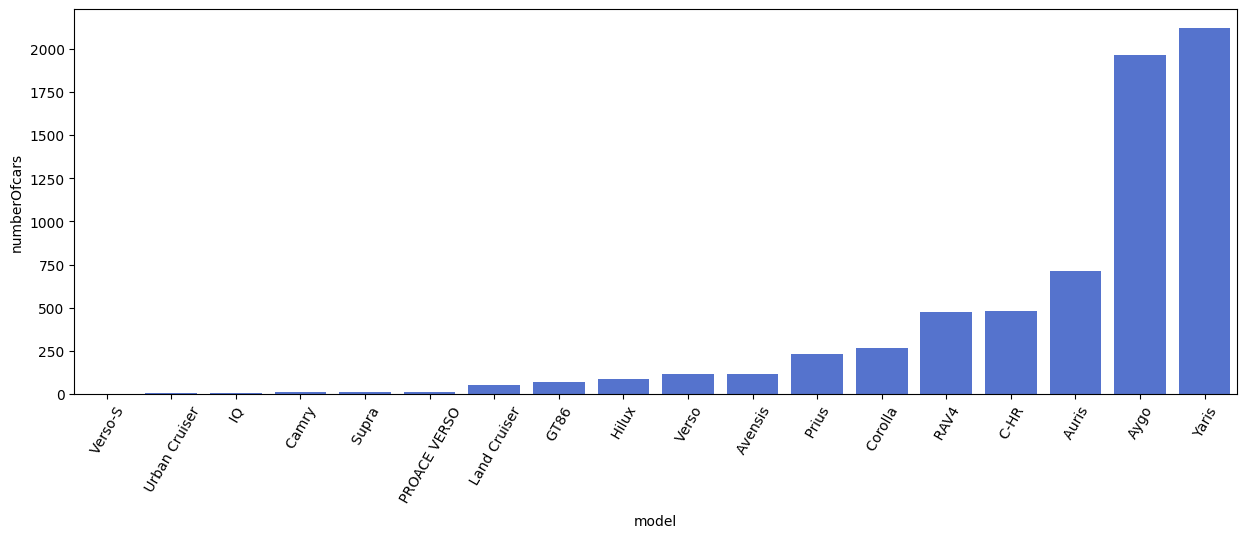

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfcars'], color='royalblue')
plt.xticks(rotation=60)

# PLot untuk Ukuran Mesin

In [ ]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

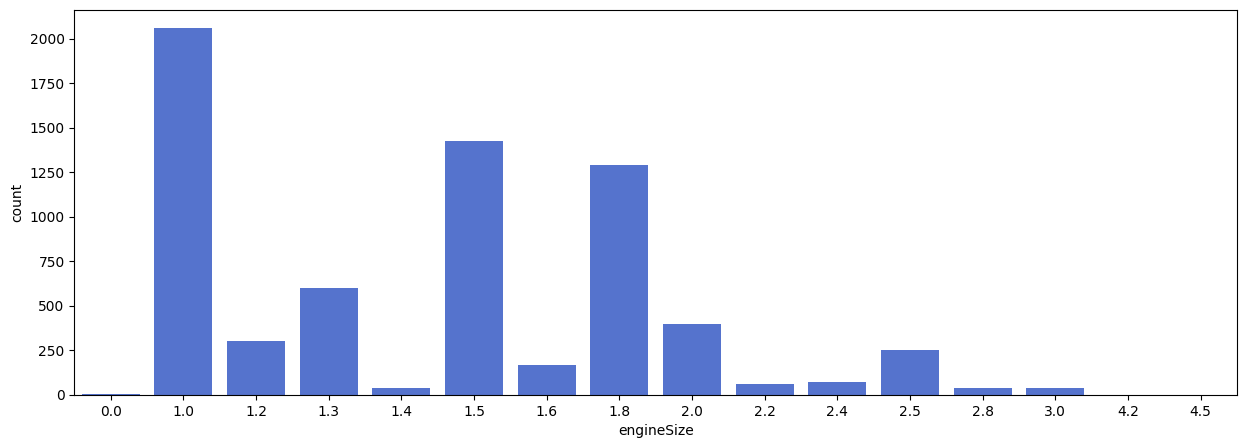

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

# Distribusi Mileage

<Axes: xlabel='mileage', ylabel='Count'>

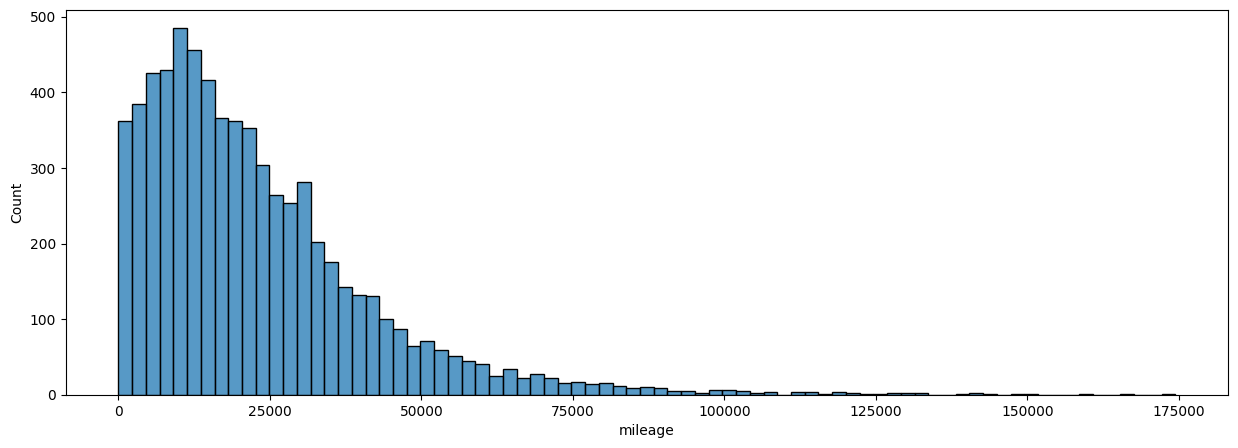

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(df['mileage'])

# Distribusi Harga Mobil

<Axes: xlabel='price', ylabel='Count'>

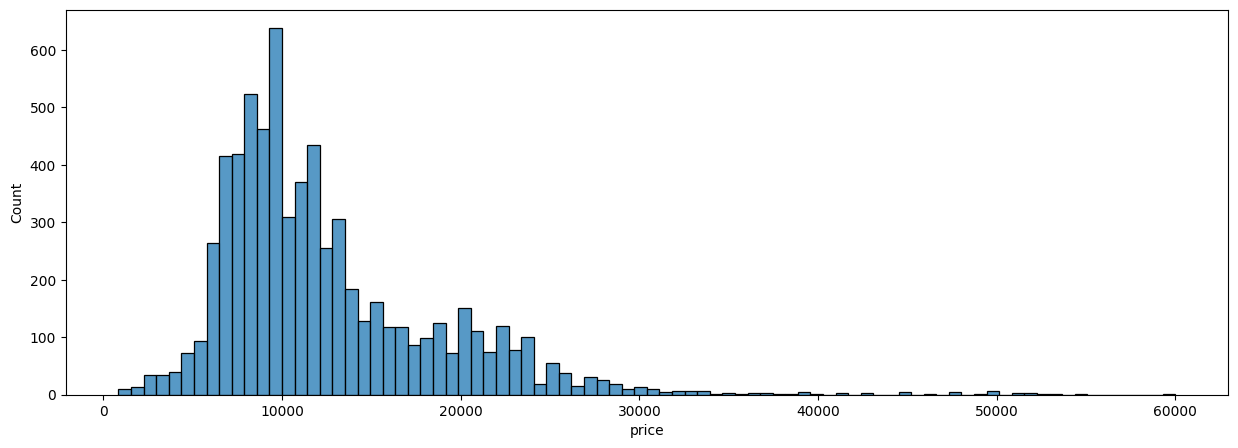

In [ ]:

plt.figure(figsize=(15,5))
sns.histplot(df['price'])

# Seleksi Feature

In [13]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((6738, 5), (6738,))

# Split Data Train dan data Testing

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=70)
x_test.shape


(1685, 5)

# Membuat Model Regresi Linear

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [16]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linear = ', score)

akurasi model regresi linear =  0.7678983314475207


# Membuat Inputan model Regresi Linear


In [17]:
#Year=2019 #mileage=5000 tax=145 mpg=30.2 engineSize=2
input_data = np.array([[2019,5000,145,30.2,2]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR :', prediction)

Estimasi harga mobil dalam EUR : [21208.50538579]


/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [18]:
import pickle

filename = 'estimasi_mobil.sav'
pickle.dump(lr, open(filename, 'wb'))